# Reference

[1]: [OpenCV Sobel Derivative](https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html)

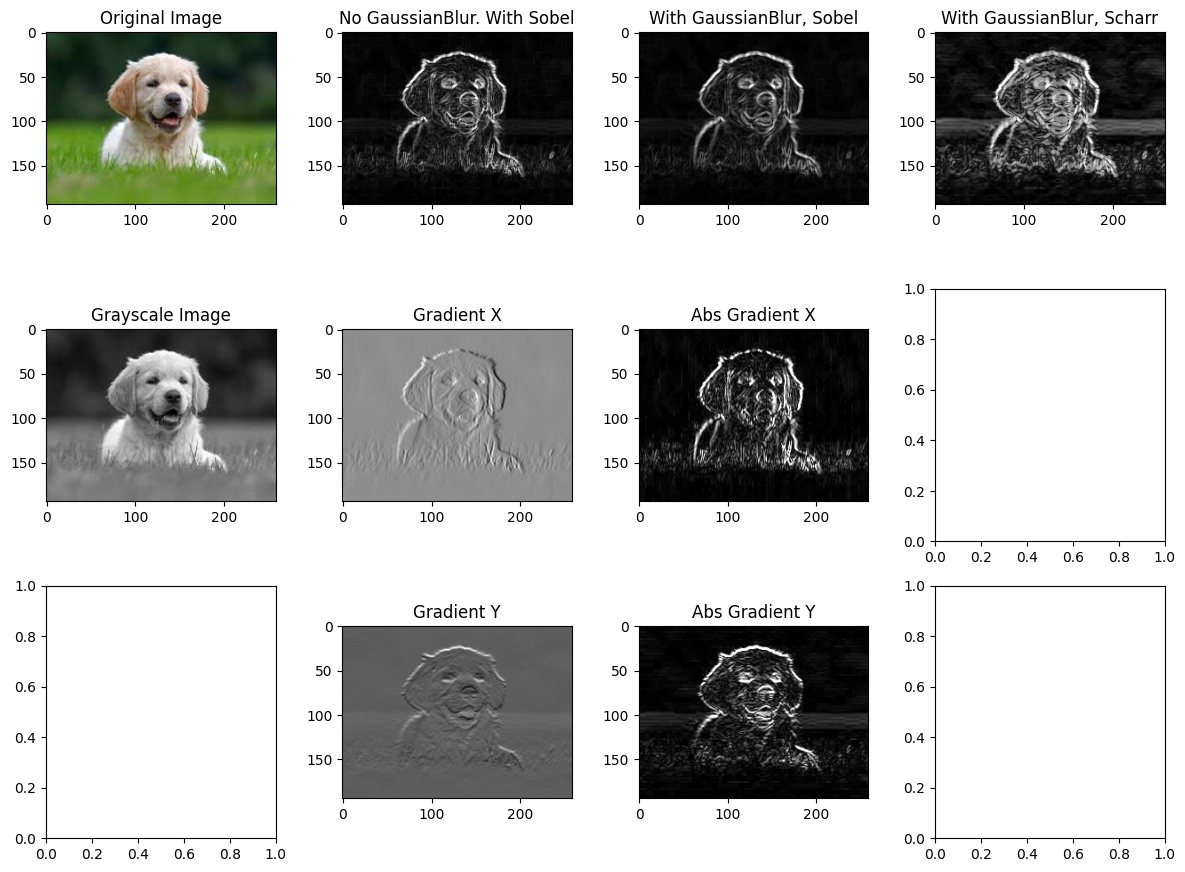

In [11]:
"""
@file sobel_demo.py
@brief Sample code using Sobel and/or Scharr OpenCV functions to make a simple Edge Detector
"""
import cv2 as cv
import matplotlib.pyplot as plt

def sobel(src: cv.typing.MatLike, reduceNoise: bool, useScharr: bool) -> tuple[dict[str, cv.typing.MatLike], int]:
  ddepth = cv.CV_16S

  # Check if image is loaded fine
  if src is None:
    print ('Error opening image')
    return {}, -1

  if reduceNoise:
    src = cv.GaussianBlur(src, (3, 3), 0)

  gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

  grad_x = cv.Sobel(gray, ddepth, 1, 0)

  # Gradient-Y
  if useScharr:
    grad_y = cv.Scharr(gray, ddepth, 0, 1)
  else:
    grad_y = cv.Sobel(gray, ddepth, 0, 1)

  abs_grad_x = cv.convertScaleAbs(grad_x)
  abs_grad_y = cv.convertScaleAbs(grad_y)

  grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

  return {
    'gray': gray,
    'grad_x': grad_x,
    'grad_y': grad_y,
    'abs_grad_x': abs_grad_x,
    'abs_grad_y': abs_grad_y,
    'grad': grad
  }, 0

# Load the image
src = cv.imread("images/01-dog.jpeg", cv.IMREAD_COLOR)
 
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

axes[0, 0].imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
axes[0, 0].set_title("Original Image")

ok, err = sobel(src, False, False)
axes[0, 1].imshow(ok['grad'], cmap='gray')
axes[0, 1].set_title("No GaussianBlur. With Sobel")

axes[1, 0].imshow(ok['gray'], cmap='gray')
axes[1, 0].set_title("Grayscale Image")

axes[1, 1].imshow(ok['grad_x'], cmap='gray')
axes[1, 1].set_title("Gradient X")

axes[1, 2].imshow(ok['abs_grad_x'], cmap='gray')
axes[1, 2].set_title("Abs Gradient X")

axes[2, 1].imshow(ok['grad_y'], cmap='gray')
axes[2, 1].set_title("Gradient Y")

axes[2, 2].imshow(ok['abs_grad_y'], cmap='gray')
axes[2, 2].set_title("Abs Gradient Y")

ok, err = sobel(src, True, False)
axes[0, 2].imshow(ok['grad'], cmap='gray')
axes[0, 2].set_title("With GaussianBlur, Sobel")

ok, err = sobel(src, True, True)
axes[0, 3].imshow(ok['grad'], cmap='gray')
axes[0, 3].set_title("With GaussianBlur, Scharr")

plt.tight_layout()
plt.show()